# Начало
* Найти зависимость выживания от пола и класса в датасете "titanic"

In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df_new = df[['survived', 'sex', 'pclass']]
df_new.head()

,survived,sex,pclass
0,0,male,3
1,1,female,1
2,1,female,3
3,1,female,1
4,0,male,3


C:\Users\Никита\AppData\Local\Temp\ipykernel_20416\572458436.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['sex'] = df_new['sex'].replace({'male' : 1, 'female' : 0})


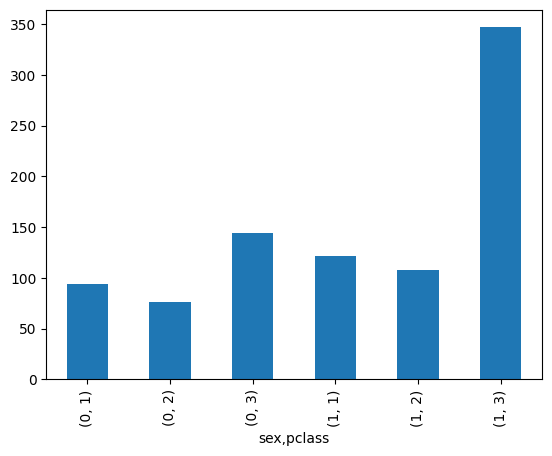

In [10]:
df_new['sex'] = df_new['sex'].replace({'male' : 1, 'female' : 0})
df_new_group = df_new.groupby(['sex','pclass'])['survived'].count().plot(kind='bar')

In [19]:
df_new.corr()

,survived,sex,pclass
survived,1.000000,-0.543351,-0.338481
sex,-0.543351,1.000000,0.131900
pclass,-0.338481,0.131900,1.000000


* Создать массив на 1000 бросков кубика
* Вычислить стандартное значение и среднее отклонение
* Простроить гистограмму распределения
* Посчитать количество выпадение каждой грани
* Занести полученный результат в БД

In [2]:
import numpy as np
import random

In [31]:
cube_list = np.random.randint(1, 7, size=1000).tolist()
cube_list[0:10]

[4, 3, 2, 5, 3, 6, 6, 2, 6, 1]

In [35]:
cube_arr = np.array(cube_list)
cube_arr[0:10]

array([4, 3, 2, 5, 3, 6, 6, 2, 6, 1])

In [44]:
print(f"Среднее значение по массиву: {np.mean(cube_arr)}")
print(f"Стандартное отклонение по массиву: {np.std(cube_arr)}")

Среднее значение по массиву: 3.5
Стандартное отклонение по массиву: 1.697056274847714


<Axes: ylabel='Count'>

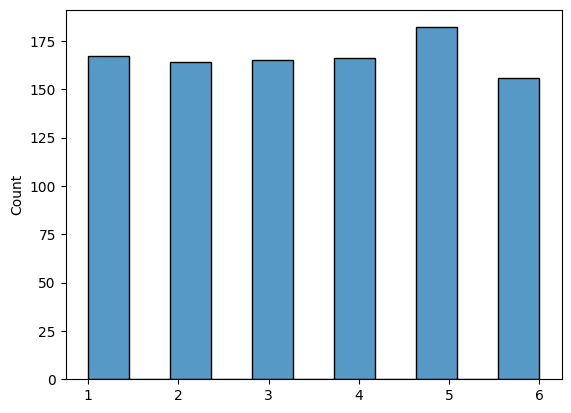

In [51]:
sns.histplot(cube_arr)

In [60]:
df = pd.DataFrame(cube_arr, columns=['value'])
df.head(10)

,value
0,4
1,3
2,2
3,5
4,3
5,6
6,6
7,2
8,6
9,1


value
5    182
1    167
4    166
3    165
2    164
6    156
Name: count, dtype: int64


<Axes: xlabel='value'>

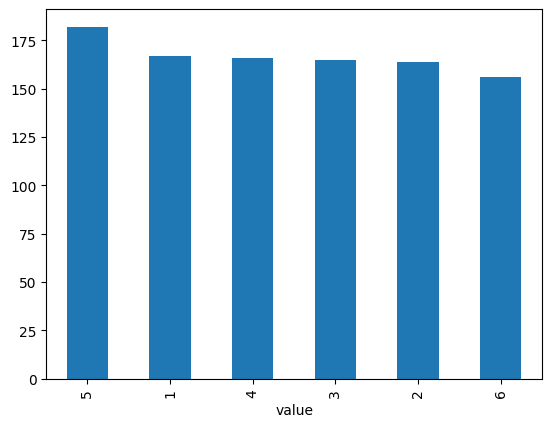

In [74]:
df_gr = df['value'].value_counts()
print(df_gr)
df_gr.plot(kind='bar')

---

# 1. Pandas: Группировка данных и агрегирование
## Задача: У вас есть DataFrame с данными о продажах товаров в разных магазинах, включая столбцы store, product, sales, date. Используя Pandas, выполните следующие шаги:
* Посчитайте общее количество продаж для каждого магазина.
* Найдите среднее количество продаж по продуктам.
* Создайте новый столбец, который будет показывать разницу в продажах между текущим и предыдущим месяцем.

In [11]:

np.random.seed(42)
stores = ['Store A', 'Store B', 'Store C']
products = ['Product 1', 'Product 2', 'Product 3']
dates = pd.date_range('2023-01-01', periods=100, freq='D')

In [12]:
data = {
    'store': np.random.choice(stores, size=100),
    'product': np.random.choice(products, size=100),
    'sales': np.random.randint(10, 100, size=100),
    'date': np.random.choice(dates, size=100)
}

df_sales = pd.DataFrame(data)

print(df_sales.head())

     store    product  sales       date
0  Store C  Product 3     61 2023-03-09
1  Store A  Product 3     71 2023-02-02
2  Store C  Product 3     67 2023-01-14
3  Store C  Product 1     61 2023-01-21
4  Store A  Product 3     21 2023-02-17


store
Store A    1736
Store B    1826
Store C    1700
Name: sales, dtype: int32


<Axes: xlabel='store'>

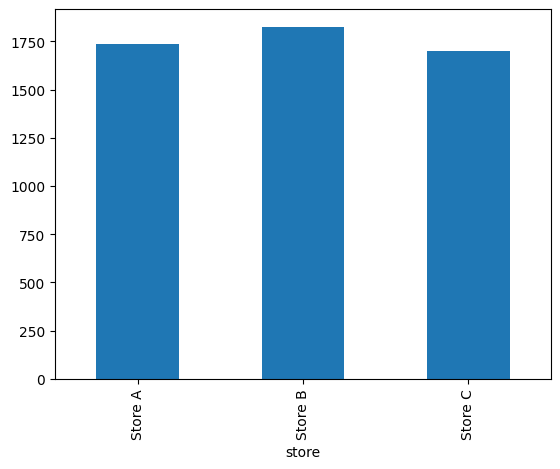

In [26]:
df_gr = df_sales.groupby(['store'])['sales'].sum()
print(df_gr)
df_gr.plot(kind='bar')

In [32]:
df_gr = df_sales.groupby(['product'])['sales'].mean()
print(df_gr)

product
Product 1    55.818182
Product 2    53.760000
Product 3    49.428571
Name: sales, dtype: float64


In [39]:
df_sales.sort_values(by='date')

,store,product,sales,date
75,Store B,Product 1,28,2023-01-02
34,Store C,Product 3,20,2023-01-04
44,Store A,Product 1,28,2023-01-06
7,Store B,Product 3,12,2023-01-07
92,Store A,Product 1,91,2023-01-07
...,...,...,...,...
54,Store B,Product 1,91,2023-04-07
23,Store B,Product 3,41,2023-04-08
86,Store C,Product 3,45,2023-04-09
45,Store C,Product 3,99,2023-04-09


In [58]:
df_sales['date'] = pd.to_datetime(df_sales['date'])
df_sales['month'] = df_sales['date'].dt.to_period('M')
df_monthly_sales = df_sales.groupby(['month'])['sales'].sum().reset_index()
print(df_monthly_sales)

     month  sales
0  2023-01   1920
1  2023-02   1684
2  2023-03   1002
3  2023-04    656


In [56]:
df_monthly_sales['diff'] = df_monthly_sales['sales'] - df_monthly_sales['sales'].shift(1)
df_monthly_sales.head()

,month,sales,sales_diff,diff
0,2023-01,1920,NaN,NaN
1,2023-02,1684,-236.0,-236.0
2,2023-03,1002,-682.0,-682.0
3,2023-04,656,-346.0,-346.0


---

# 2. NumPy: Работа с массивами и операциями
## Задача: Создайте два массива с помощью NumPy:
* Первый массив должен быть случайно заполнен числами от 1 до 100 (размер 10x10).
* Второй массив должен содержать только четные числа от 1 до 50. Затем:
* Найдите среднее, стандартное отклонение и сумму всех чисел в первом массиве.
* Создайте маску для второго массива, чтобы выбрать только те числа, которые больше 20, и найдите их среднее значение.

In [71]:
np.random.seed(42)
arr1 = np.random.randint(1, 100, size=(10,10))
print(f"Массив 1 = {arr1}")
arr2 = np.arange(1, 50, 2)
print(f"Массив 2 = {arr2}")

Массив 1 = [[52 93 15 72 61 21 83 87 75 75]
 [88 24  3 22 53  2 88 30 38  2]
 [64 60 21 33 76 58 22 89 49 91]
 [59 42 92 60 80 15 62 62 47 62]
 [51 55 64  3 51  7 21 73 39 18]
 [ 4 89 60 14  9 90 53  2 84 92]
 [60 71 44  8 47 35 78 81 36 50]
 [ 4  2  6 54  4 54 93 63 18 90]
 [44 34 74 62 14 95 48 15 72 78]
 [87 62 40 85 80 82 53 24 26 89]]
Массив 2 = [ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47
 49]


In [72]:
print(f"Среднее по массиву: {np.mean(arr1)}")
print(f"Стандартное отклонение по массиву: {np.std(arr1)}")
print(f"Сумма по массиву: {np.sum(arr1)}")

Среднее по массиву: 50.69
Стандартное отклонение по массиву: 28.811350193977376
Сумма по массиву: 5069


In [73]:
mask = arr2 > 20
selected = arr2[mask]
print(f"Результат {np.mean(selected)}")


Результат 35.0


---
# 3. Seaborn: Визуализация распределений и зависимостей
## Задача: Используя набор данных Seaborn (например, tips или iris), выполните следующее:
* Постройте гистограмму для распределения чаевых (tip) в наборе данных tips.
* Постройте график рассеяния (scatter plot) для двух переменных (например, total_bill и tip) с добавлением линейной регрессии.
* Используйте pairplot для визуализации зависимостей между несколькими переменными.

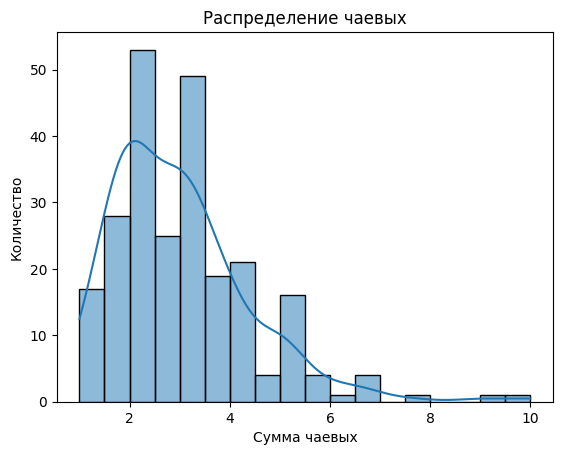

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
df = sns.load_dataset('tips')
sns.histplot(df['tip'], kde=True)
plt.title('Распределение чаевых')
plt.xlabel('Сумма чаевых')
plt.ylabel('Количество')
plt.show()

## Это без линейной регрессии

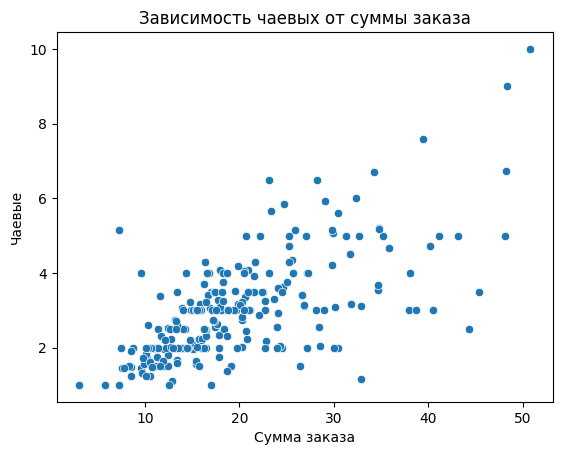

In [6]:
sns.scatterplot(x=df['total_bill'], y=df['tip'])
plt.title('Зависимость чаевых от суммы заказа')
plt.xlabel('Сумма заказа')
plt.ylabel('Чаевые')
plt.show()

## Это с линейной регрессией

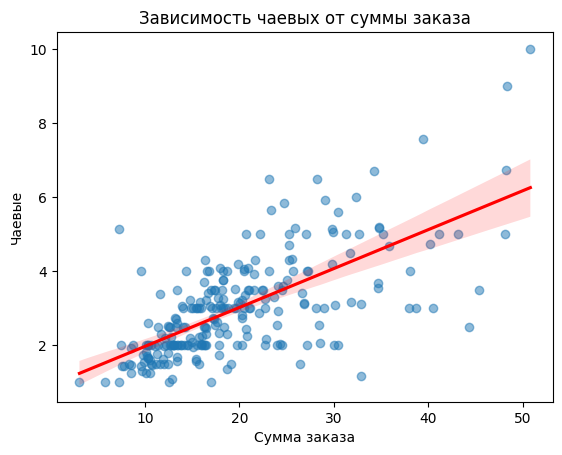

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.regplot(x=df['total_bill'], y=df['tip'], scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Зависимость чаевых от суммы заказа')
plt.xlabel('Сумма заказа')
plt.ylabel('Чаевые')
plt.show()

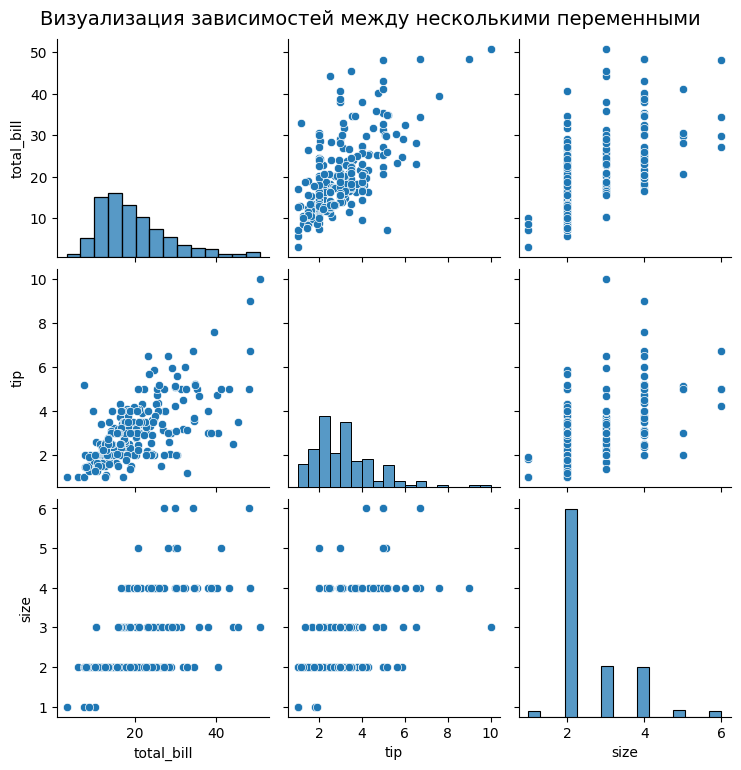

In [13]:
sns.pairplot(df)
plt.suptitle('Визуализация зависимостей между несколькими переменными', fontsize=14, y=1.02)
# Через plot.title не работает, криво строит название
plt.show()

---
# 4. Matplotlib: Построение графиков
## Задача: Используя Matplotlib, создайте:
* Линейный график, показывающий изменения температуры (от 0 до 100 градусов) за 12 часов.
* Столбчатую диаграмму для сравнения количества продаж разных категорий товаров в магазине.
* Круговую диаграмму, отображающую долю различных категорий продуктов в общем объеме продаж.

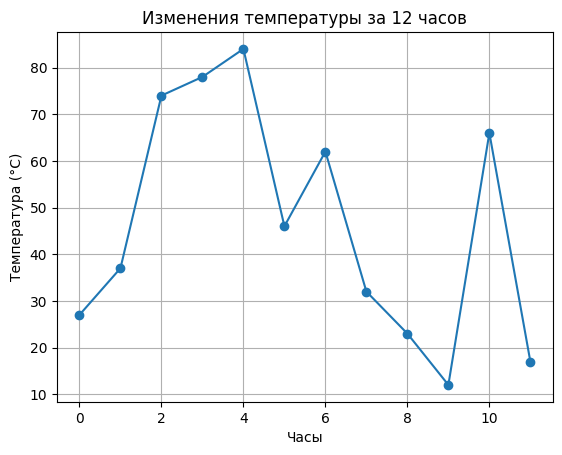

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
temp = np.random.randint(0, 101, 12)
plt.plot(temp, marker='o') # marker = 'o' точки - опционально
plt.title('Изменения температуры за 12 часов')
plt.xlabel('Часы')
plt.ylabel('Температура (°C)')
plt.grid(True) # Сетка - опционально 
plt.show()

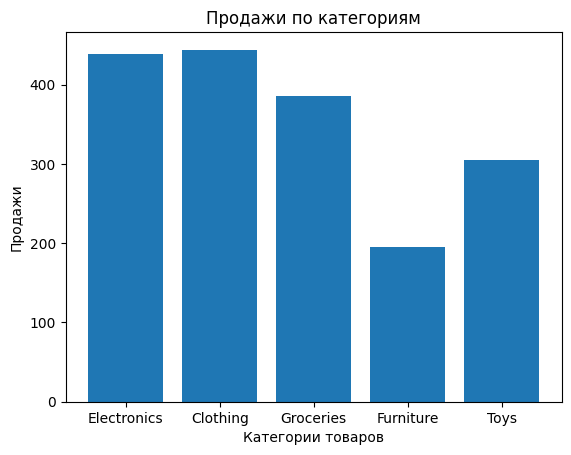

In [5]:
categories = ['Electronics', 'Clothing', 'Groceries', 'Furniture', 'Toys']
sales = np.random.randint(100, 500, size=5)
plt.bar(categories, sales)
plt.title('Продажи по категориям')
plt.xlabel('Категории товаров')
plt.ylabel('Продажи')
plt.show()

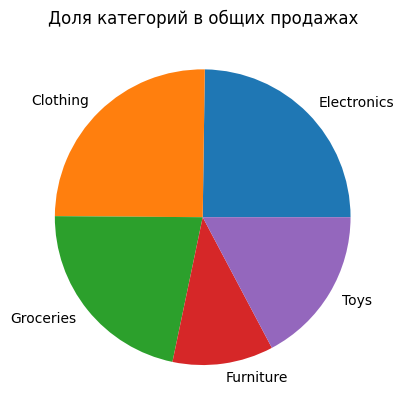

In [6]:
plt.pie(sales, labels=categories)
plt.title('Доля категорий в общих продажах')
plt.show()

---
# 5. Pandas + Matplotlib: Визуализация агрегированных данных
### Задача: У вас есть DataFrame с данными о продажах товаров по месяцам. Используя Pandas и Matplotlib:
* Сгруппируйте данные по месяцу и посчитайте общие продажи для каждого месяца.
* Постройте линейный график, показывающий изменение объема продаж по месяцам.

In [67]:
import numpy as np 
np.random.seed(42)
dates = pd.date_range('2023-01-01', periods=1000)
sales_data = np.random.randint(500, 1500, size=1000)
df = pd.DataFrame({'Дата': dates, 'Продажи': sales_data})
print(df.head(20))

         Дата  Продажи
0  2023-01-01      602
1  2023-01-02      935
2  2023-01-03     1360
3  2023-01-04      770
4  2023-01-05      606
5  2023-01-06      571
6  2023-01-07     1200
7  2023-01-08      520
8  2023-01-09     1114
9  2023-01-10      621
10 2023-01-11      966
11 2023-01-12      714
12 2023-01-13      830
13 2023-01-14      958
14 2023-01-15      587
15 2023-01-16      872
16 2023-01-17      599
17 2023-01-18     1371
18 2023-01-19     1163
19 2023-01-20      630


In [68]:
df['Месяц'] = df['Дата'].dt.strftime('%B %Y')
df_month = df.groupby('Месяц')['Продажи'].sum()
df_month.head()

Месяц
April 2023     31340
April 2024     26968
April 2025     29050
August 2023    31798
August 2024    32195
Name: Продажи, dtype: int32

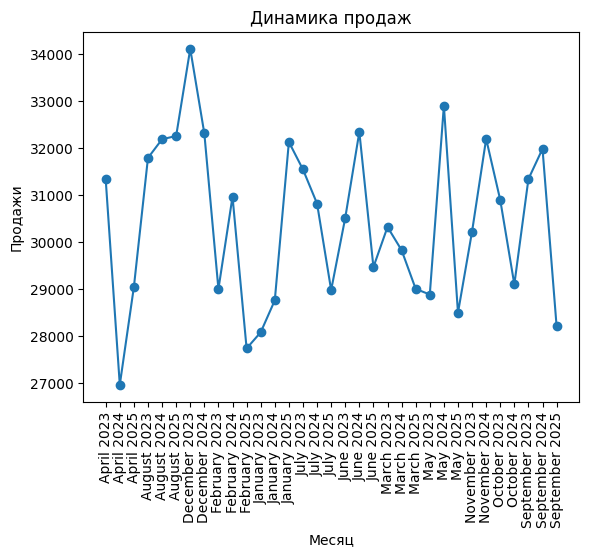

In [69]:
plt.plot(df_month, marker='o')
plt.title('Динамика продаж')
plt.xlabel('Месяц')
plt.ylabel('Продажи')
plt.xticks(rotation=90)
plt.show()

---
# 6. Линейная регрессия: предсказание цены дома
* У вас есть набор данных с информацией о домах: площадь (м²) и цена (тыс. $).
* Задача: Используя линейную регрессию, предскажите цену дома на основе его площади.

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
df = pd.read_csv('./datas/house_prices_6.csv')
df.head()

,Площадь,Цена
0,132,211.0
1,122,168.0
2,44,67.0
3,136,194.0
4,101,146.5


In [ ]:
# Разделяем на признаки (X) и целевую переменную (y)
X = df[['Площадь']]  # Признак - площадь дома
y = df['Цена']  # Целевая переменная - цена дома
# (80% - train, 20% - test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
# Обучаем модель линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [51]:
y_pred = model.predict(X_test)

In [52]:
# Оцениваем качество модели
mae = mean_absolute_error(y_test, y_pred)  # Средняя абсолютная ошибка
mse = mean_squared_error(y_test, y_pred)  # Среднеквадратичная ошибка
r2 = r2_score(y_test, y_pred)  # Коэффициент детерминации R²

In [54]:
print(f"Средняя абсолютная ошибка (MAE): {mae:.2f}")
print(f"Среднеквадратичная ошибка (MSE): {mse:.2f}")
print(f"Коэффициент детерминации (R²): {r2:.2f}")

Средняя абсолютная ошибка (MAE): 10.96
Среднеквадратичная ошибка (MSE): 153.12
Коэффициент детерминации (R²): 0.98


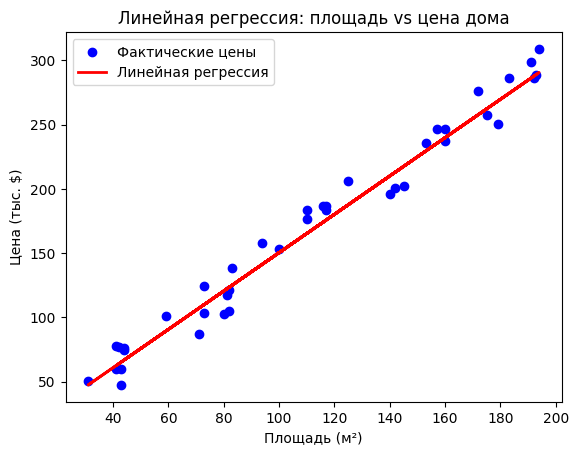

In [56]:
plt.scatter(X_test, y_test, color="blue", label="Фактические цены")
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Линейная регрессия")
plt.xlabel("Площадь (м²)")
plt.ylabel("Цена (тыс. $)")
plt.title("Линейная регрессия: площадь vs цена дома")
plt.legend()
plt.show()

In [60]:
# Создаем новые данные для предсказания (площадь дома)
new_house_120 = pd.DataFrame([[120]], columns=['Площадь'])
predicted_price_120 = model.predict(new_house_120)
print(f"Предсказанная цена дома (120 м²): {predicted_price_120[0]:.2f} тыс. $")

new_house_1200 = pd.DataFrame([[1200]], columns=['Площадь'])
predicted_price_1200 = model.predict(new_house_1200)
print(f"Предсказанная цена дома (1200 м²): {predicted_price_1200[0]:.2f} тыс. $")

new_house_12 = pd.DataFrame([[12]], columns=['Площадь'])
predicted_price_12 = model.predict(new_house_12)
print(f"Предсказанная цена дома (12 м²): {predicted_price_12[0]:.2f} тыс. $")

Предсказанная цена дома (120 м²): 180.24 тыс. $
Предсказанная цена дома (1200 м²): 1791.35 тыс. $
Предсказанная цена дома (12 м²): 19.13 тыс. $


---
# 7. Классификация: предсказание успешности студента
* Дан набор данных о студентах, включающий количество часов учебы, средний балл и посещаемость.
* Задача: Постройте модель классификации, которая предскажет, сдал студент экзамен (1) или нет (0).

In [90]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [97]:
df = pd.read_csv('./datas/student_performance_7.csv')
df.head()

,Часы учебы,Средний балл,Посещаемость,Сдал
0,10,75,80,1
1,15,85,90,1
2,12,70,85,1
3,9,60,70,0
4,14,90,95,1


In [98]:
X = df[['Часы учебы', 'Средний балл', 'Посещаемость']]
y = df['Сдал']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [100]:
# Создаем модель логистической регрессии
model = LogisticRegression()
# Обучаем модель
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Делаем предсказания на тестовой выборке
y_pred = model.predict(X_test)
# Оценка модели
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy:.2f}")
print("Отчет о классификации:")
print(classification_report(y_test, y_pred))

Точность модели: 1.00
Отчет о классификации:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [103]:
new_student = pd.DataFrame([[5, 70, 90]], columns=['Часы учебы', 'Средний балл', 'Посещаемость'])
new_student_pred = model.predict(new_student)
print(f"Предсказание для нового студента: {new_student_pred[0]}")

Предсказание для нового студента: 1


---
# 8. Кластеризация: сегментация клиентов
* У вас есть данные о клиентах интернет-магазина (возраст, средний чек, частота покупок).
* Задача: Используя метод k-средних, разделите клиентов на группы (сегменты).

In [106]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
# Пример данных о клиентах
df = pd.read_csv('./datas/customer_segments_8.csv')
# Разделение данных на признаки
X = df[['Возраст', 'Средний чек', 'Частота покупок']]

In [107]:
# Применяем метод k-средних
kmeans = KMeans(n_clusters=3, random_state=42)
df['Кластер'] = kmeans.fit_predict(X)

# Выводим результаты
print(df)

       Возраст  Средний чек  Частота покупок  Кластер
0    76.463412  1001.466359       -17.799218        2
1    54.545529   946.062267         6.914103        2
2    87.643180  1012.974198         4.657638        2
3    15.501094   486.933415        40.309085        1
4    59.431419  1512.907519        29.372631        0
..         ...          ...              ...      ...
295   3.845781   516.450898       -19.416873        1
296  10.693926   513.591955        -9.607333        1
297  62.584424  1002.187896        22.515332        2
298  48.750664  1012.648155        27.451089        2
299  42.315104   475.994072        -1.690025        1

[300 rows x 4 columns]


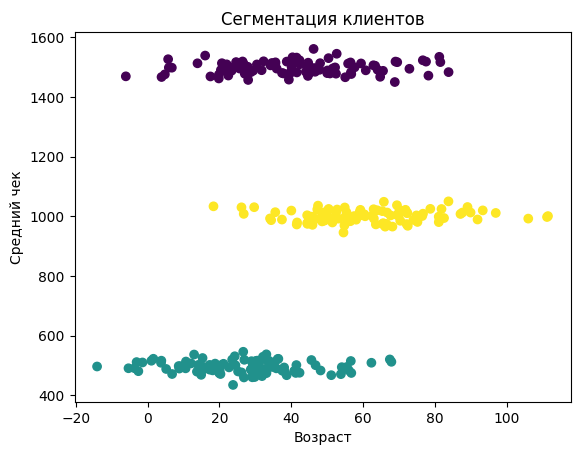

In [108]:
plt.scatter(df['Возраст'], df['Средний чек'], c=df['Кластер'], cmap='viridis')
plt.xlabel('Возраст')
plt.ylabel('Средний чек')
plt.title('Сегментация клиентов')
plt.show()

In [109]:
new_client = pd.DataFrame([[35, 100, 5]], columns=['Возраст', 'Средний чек', 'Частота покупок'])
new_client['Кластер'] = kmeans.predict(new_client)
print(new_client)

   Возраст  Средний чек  Частота покупок  Кластер
0       35          100                5        1


---
# 9. Дерево решений: предсказание болезни
* В медицинском наборе данных есть признаки (возраст, уровень сахара, давление) и диагноз (болен/здоров).
* Задача: Используйте дерево решений, чтобы определить, болен человек или нет.

In [113]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
# Пример медицинских данных
df = pd.read_csv('./datas/medical_diagnosis_9.csv')
# Разделение данных на признаки и целевую переменную
X = df[['Возраст', 'Уровень сахара', 'Давление']]
y = df['Болен']
# Разделяем данные на тренировочную и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [114]:
# Создаем модель дерева решений
model = DecisionTreeClassifier(random_state=42)

# Обучаем модель
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [117]:
# Делаем предсказания на тестовой выборке
y_pred = model.predict(X_test)

# Оценка модели
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy:.2f}")
print("Отчет о классификации:")
print(classification_report(y_test, y_pred))

Точность модели: 0.98
Отчет о классификации:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        98
           1       0.00      0.00      0.00         2

    accuracy                           0.98       100
   macro avg       0.49      0.50      0.49       100
weighted avg       0.96      0.98      0.97       100



C:\Users\Никита\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Никита\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Никита\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classific

In [121]:
new_man = pd.DataFrame([[35, 443, 140]], columns=['Возраст', 'Уровень сахара', 'Давление'])
new_man_pred = model.predict(new_man)
print(f"Предсказание для нового пациента {new_man_pred[0]}")

Предсказание для нового пациента 0


---
# 10. Анализ тональности текста: положительный или отрицательный отзыв
* У вас есть отзывы пользователей о продуктах (например, тексты комментариев).
* Задача: Постройте модель NLP, которая будет классифицировать отзывы как положительные или отрицательные.

In [124]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
# Пример данных о текстах отзывов
df = pd.read_csv('./datas/reviews_sentiment_10.csv')
# Разделение данных на текст и целевую переменную
X = df['Отзыв']
y = df['Тональность']

In [125]:
# Преобразуем текстовые данные в числовые признаки с помощью CountVectorizer
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Разделяем данные на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

In [126]:
# Создаем модель наивного байесовского классификатора
model = MultinomialNB()

# Обучаем модель
model.fit(X_train, y_train)

MultinomialNB()

In [127]:
# Делаем предсказания на тестовой выборке
y_pred = model.predict(X_test)

# Оценка модели
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy:.2f}")
print("Отчет о классификации:")
print(classification_report(y_test, y_pred))

Точность модели: 1.00
Отчет о классификации:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00        54

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [130]:
new_review = ['Очень крутой фильм, просто шедевр!']
new_review_vectorized = vectorizer.transform(new_review)
new_review_pred = model.predict(new_review_vectorized)
print(f"Тональность нового отзыва: {new_review_pred[0]}")

Тональность нового отзыва: 1


---
# 11. Линейная регрессия: предсказание дохода на основе образования и опыта работы
* Дан набор данных, в котором содержатся сведения о годах образования и опыте работы людей, а также их доход.
* Задача: Постройте модель линейной регрессии, которая предскажет доход человека на основе его уровня образования (в годах) и опыта работы (в годах).

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [78]:
df = pd.read_csv('./datas/income_data_11.csv')
df.head()

,Годы_образования,Опыт_работы,Доход
0,18,34,207000
1,15,36,198000
2,19,13,149000
3,16,2,101000
4,18,0,105000


In [80]:
X = df[['Годы_образования', 'Опыт_работы']]  
y = df['Доход']

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [82]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [83]:
y_pred = model.predict(X_test)

In [84]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [85]:
print(f"Средняя абсолютная ошибка (MAE): {mae:.2f}")
print(f"Среднеквадратичная ошибка (MSE): {mse:.2f}")
print(f"Коэффициент детерминации (R²): {r2:.2f}")

Средняя абсолютная ошибка (MAE): 0.00
Среднеквадратичная ошибка (MSE): 0.00
Коэффициент детерминации (R²): 1.00


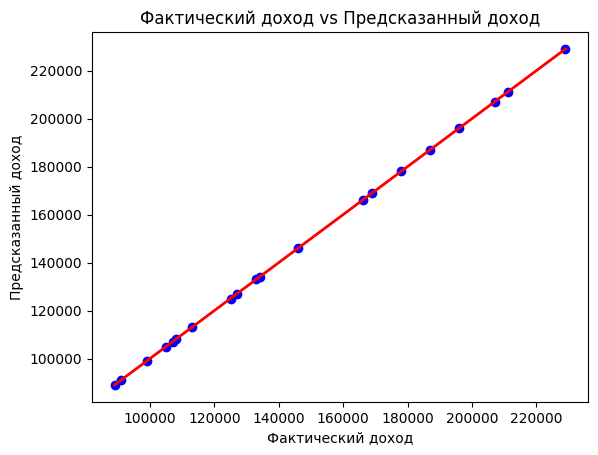

In [86]:
plt.scatter(y_test, y_pred, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linewidth=2)
plt.xlabel("Фактический доход")
plt.ylabel("Предсказанный доход")
plt.title("Фактический доход vs Предсказанный доход")
plt.show()

In [89]:
new_man_1= pd.DataFrame([[20, 40]], columns=['Годы_образования', 'Опыт_работы'])
predicted_pay= model.predict(new_man_1)
print(f"Предсказанная ЗП: {predicted_pay[0]:.2f} тыс")

Предсказанная ЗП: 235000.00 тыс
